# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# style choices
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [4]:
# make a df, each index is date, each column is a random number with adjusted values
np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                  'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                 index=pd.date_range('1/1/2017', periods = 365)
                 )
df.head()

A          B          C
2017-01-01 -1.085631  20.059291 -20.230904
2017-01-02 -0.088285  21.803332 -16.659325
2017-01-03  0.194693  20.835588 -17.055481
2017-01-04 -1.311601  21.255156 -17.093802
2017-01-05 -1.890202  21.462083 -19.518638

<IPython.core.display.Javascript object>


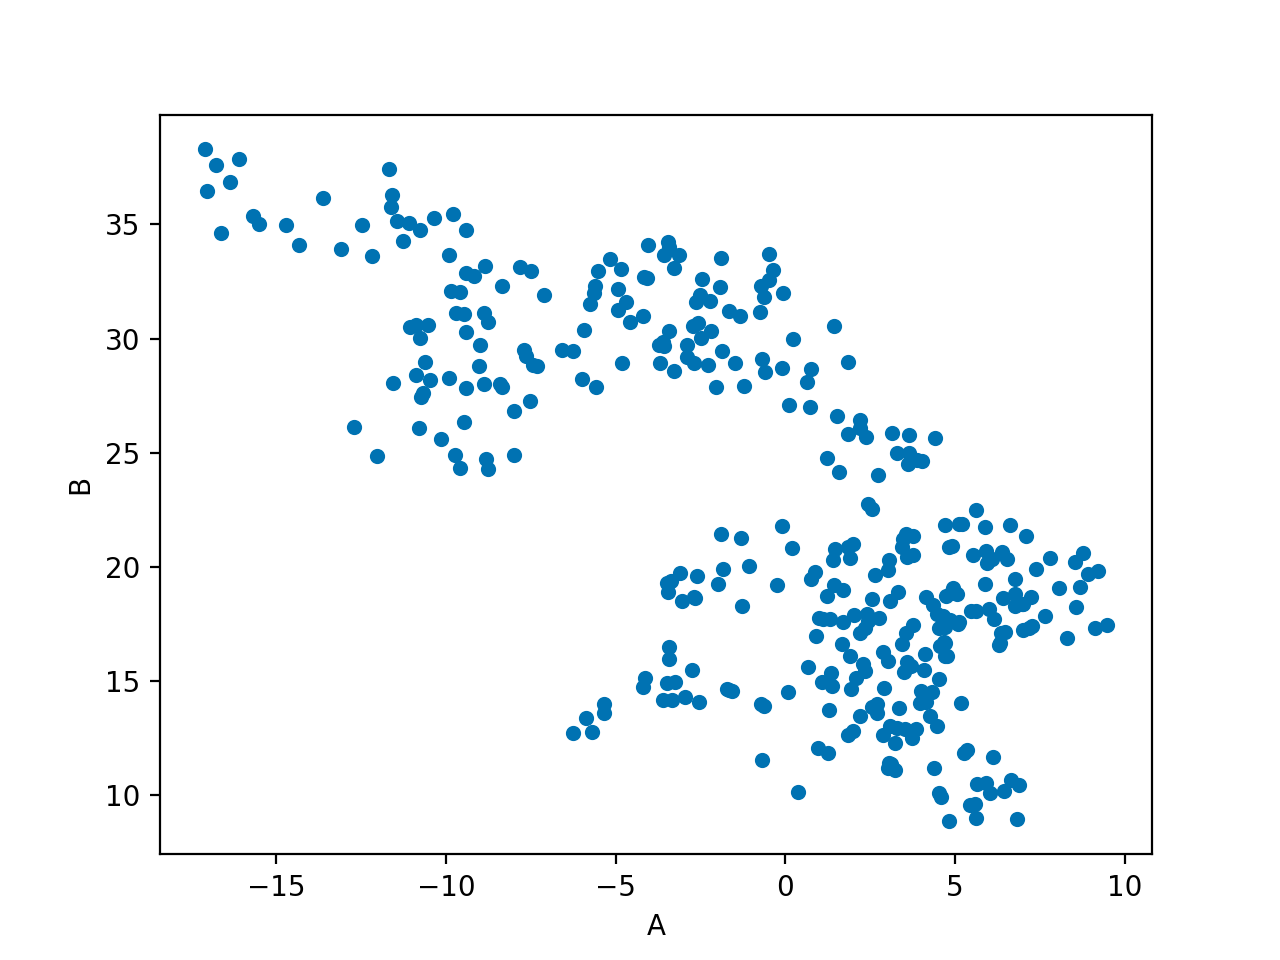

In [5]:
df.plot('A','B', kind='scatter')

<IPython.core.display.Javascript object>


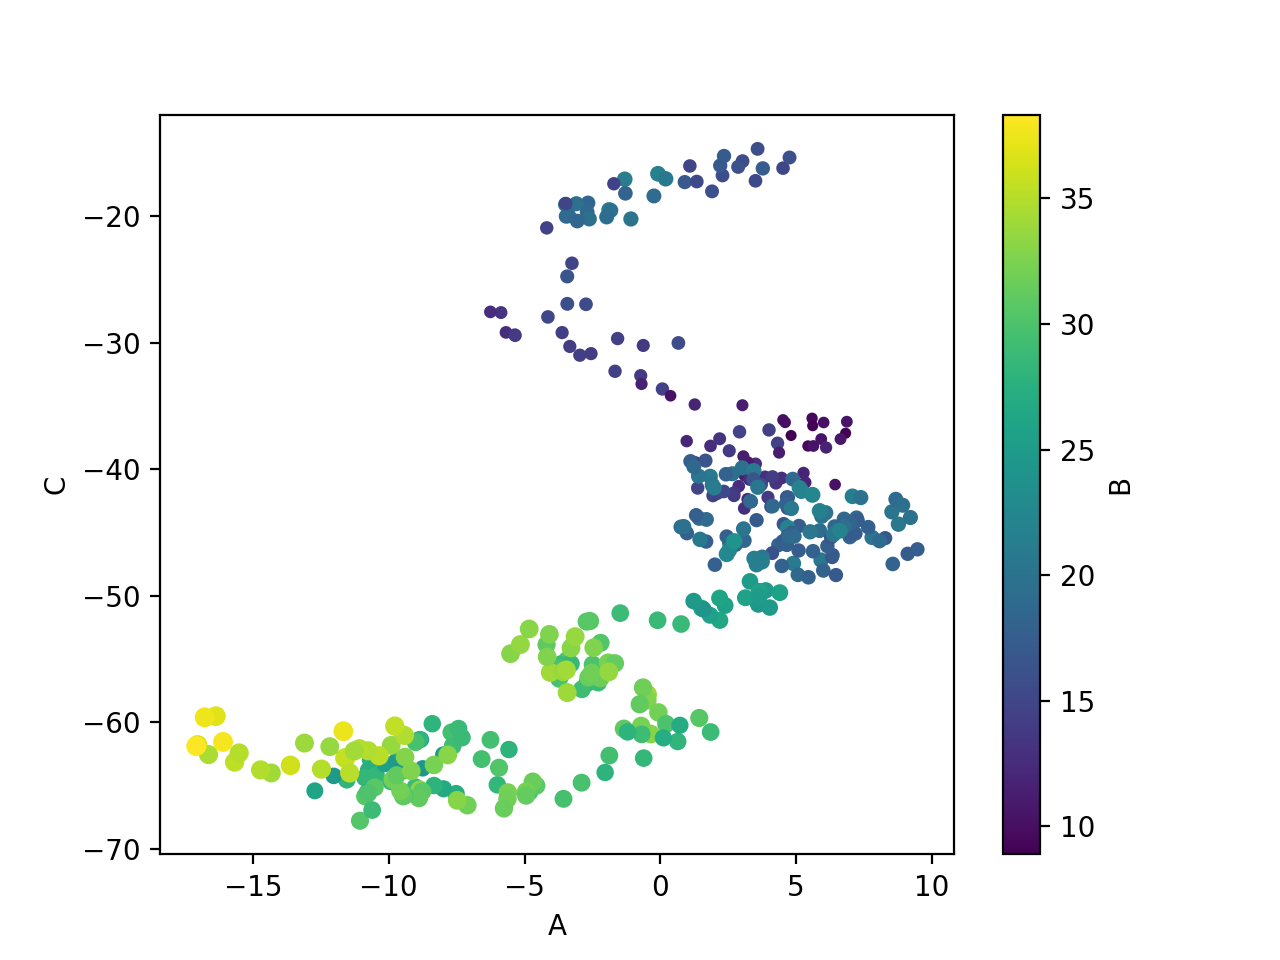

In [6]:
# x=A, y=C, colorbar= heat map of B, size of bubble=B
df.plot.scatter('A','C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


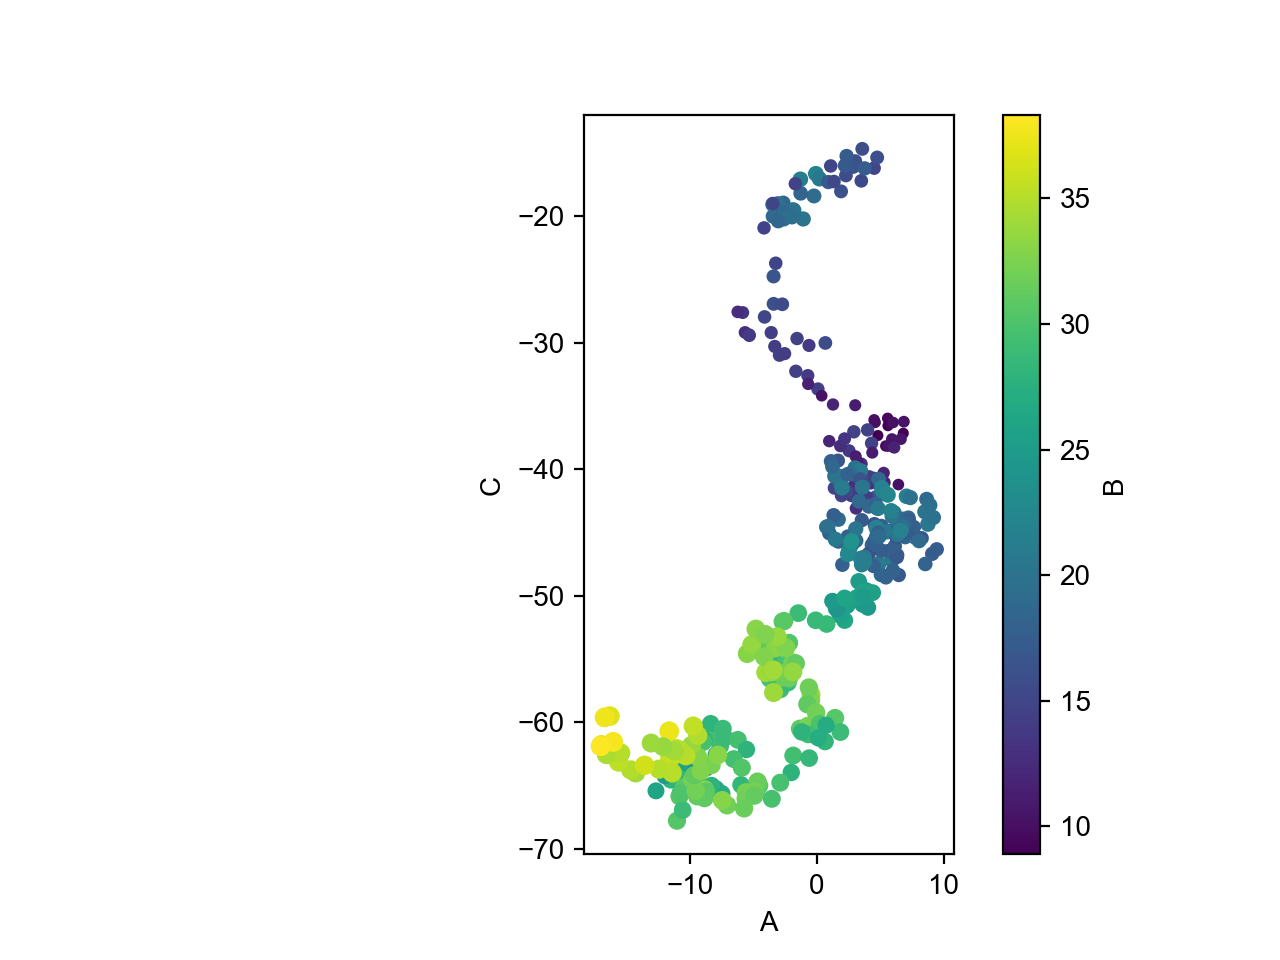

In [7]:
#same thing but with an equal aspect
ax = df.plot.scatter('A','C',c='B',s=df['B'],colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


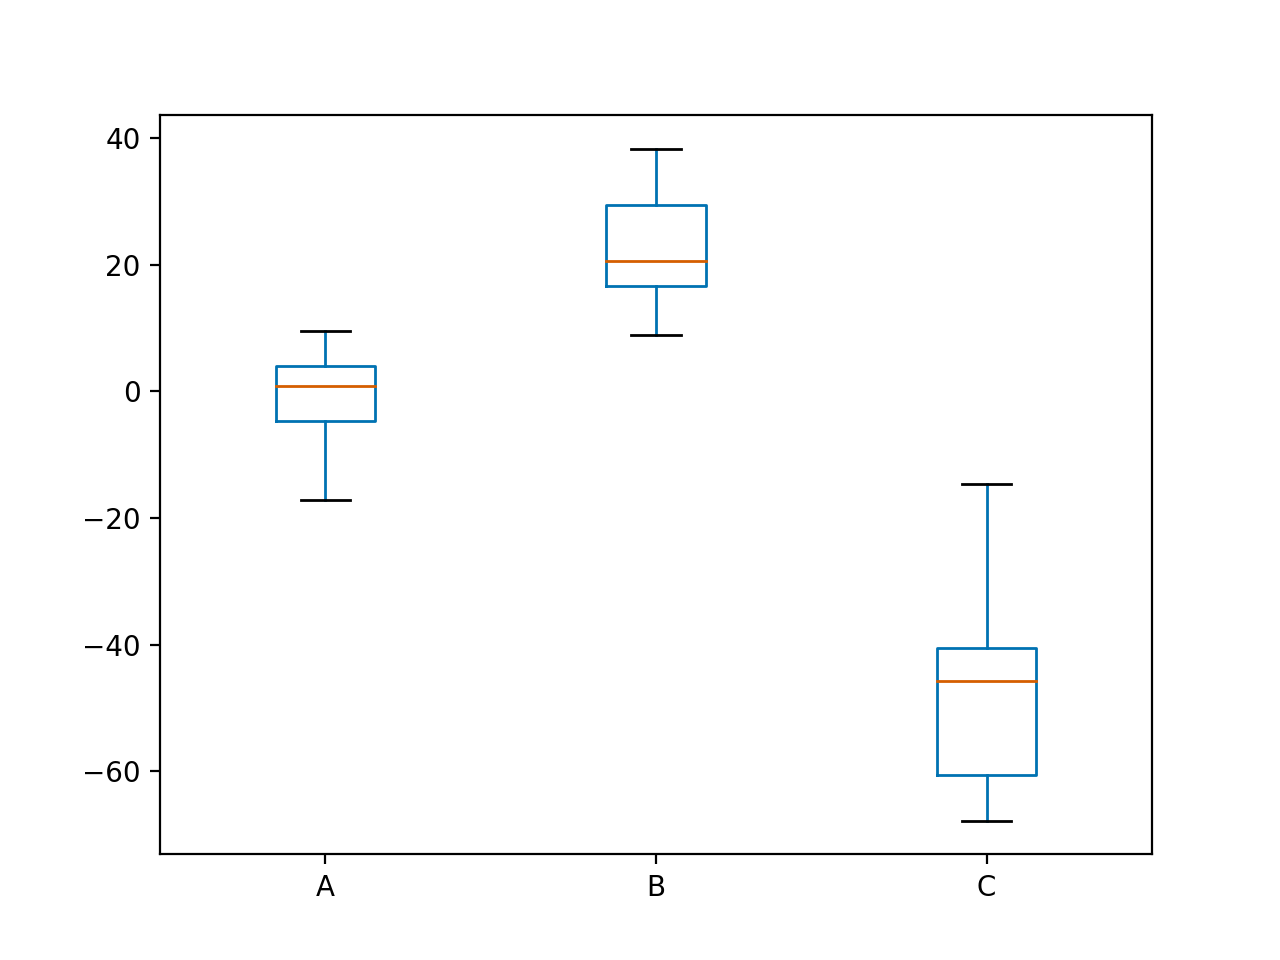

In [8]:
# boxplot for the df
df.plot.box()

<IPython.core.display.Javascript object>


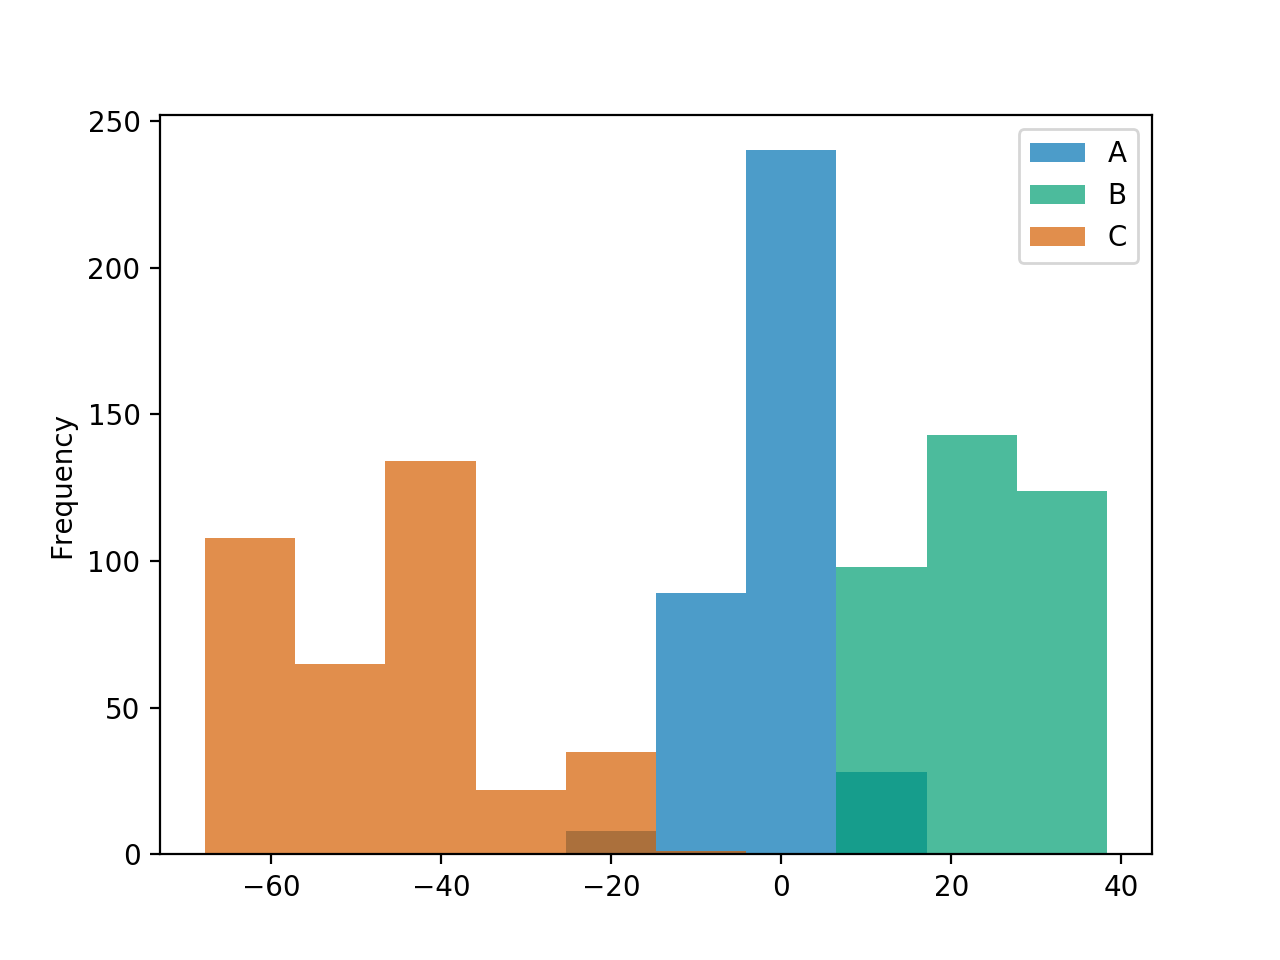

In [9]:
# histogram for the df
df.plot.hist(alpha=0.7)

<IPython.core.display.Javascript object>


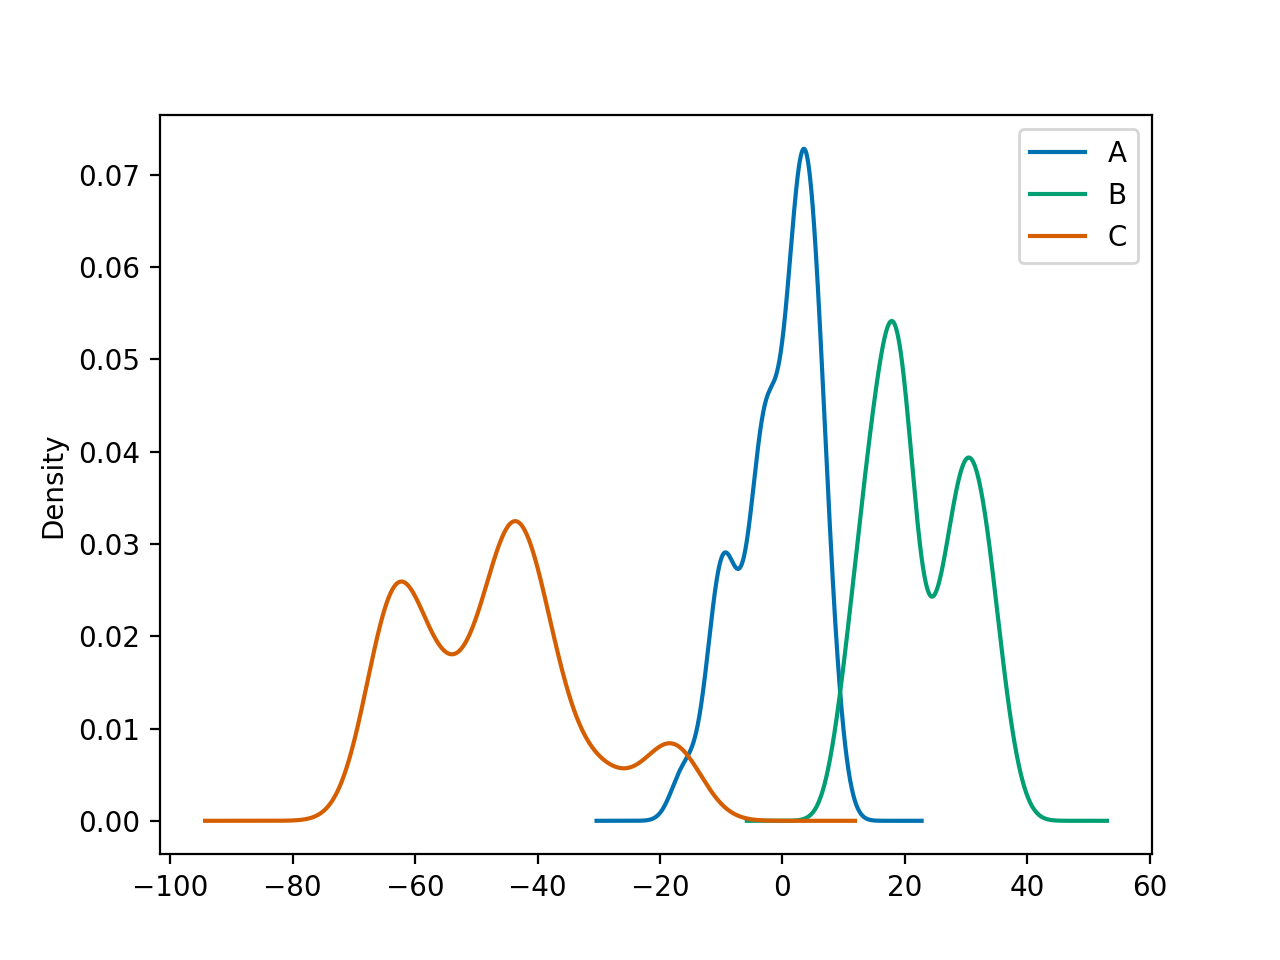

In [10]:
# kernal density estimation plots 
df.plot.kde()

### pandas.tools.plotting

In [11]:
iris = pd.read_csv('iris.csv')
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


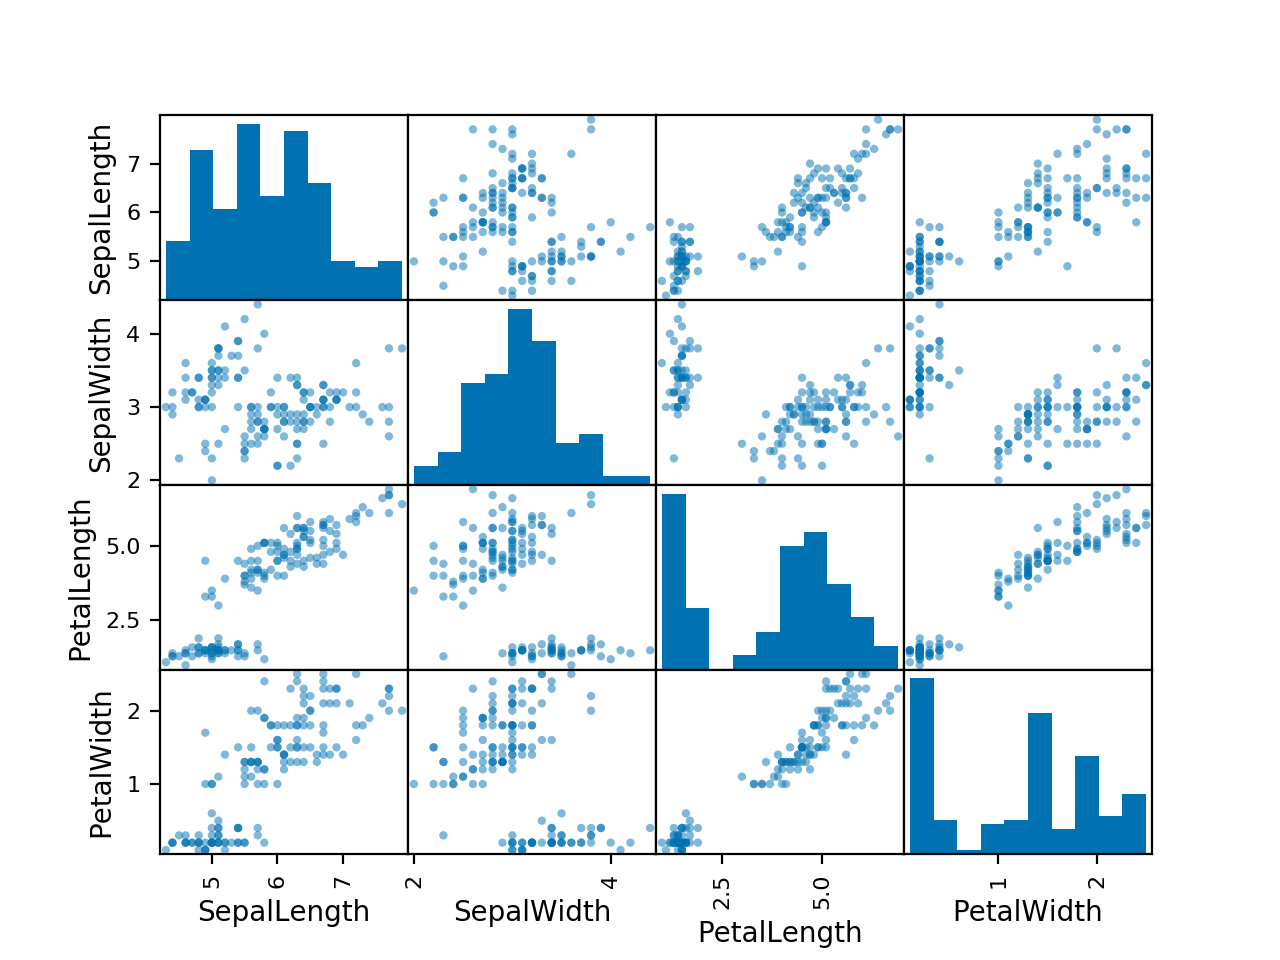

In [12]:
#scatter matrix, took me a whiel to fix b/c notes is using older version pandas
pd.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


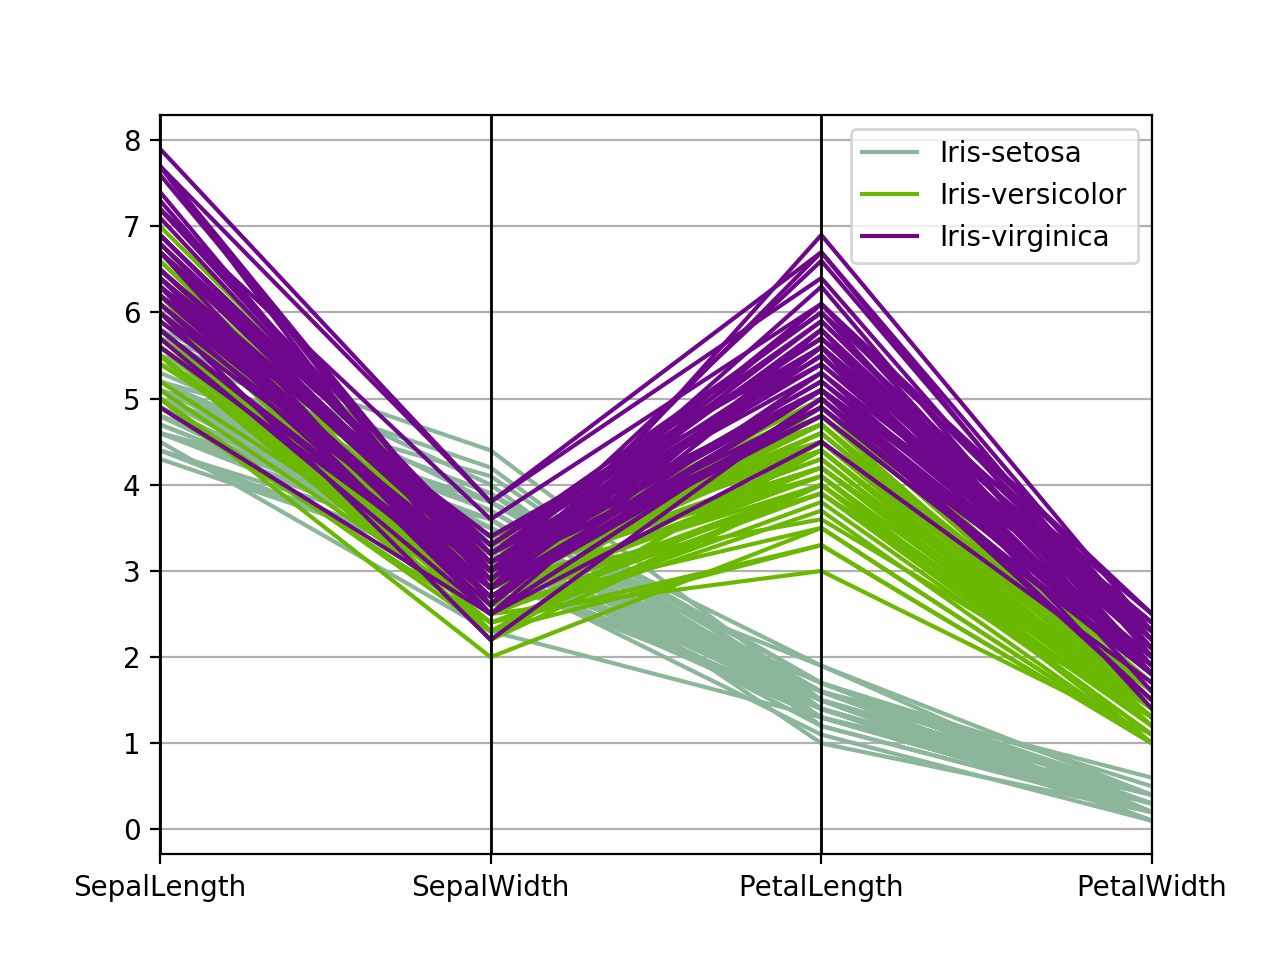

In [13]:
# parallel coordinates
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [14]:
import seaborn as sns

In [15]:
#generate v1 = random normal distributin, v2 = modified v1
np.random.seed(1234)
v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


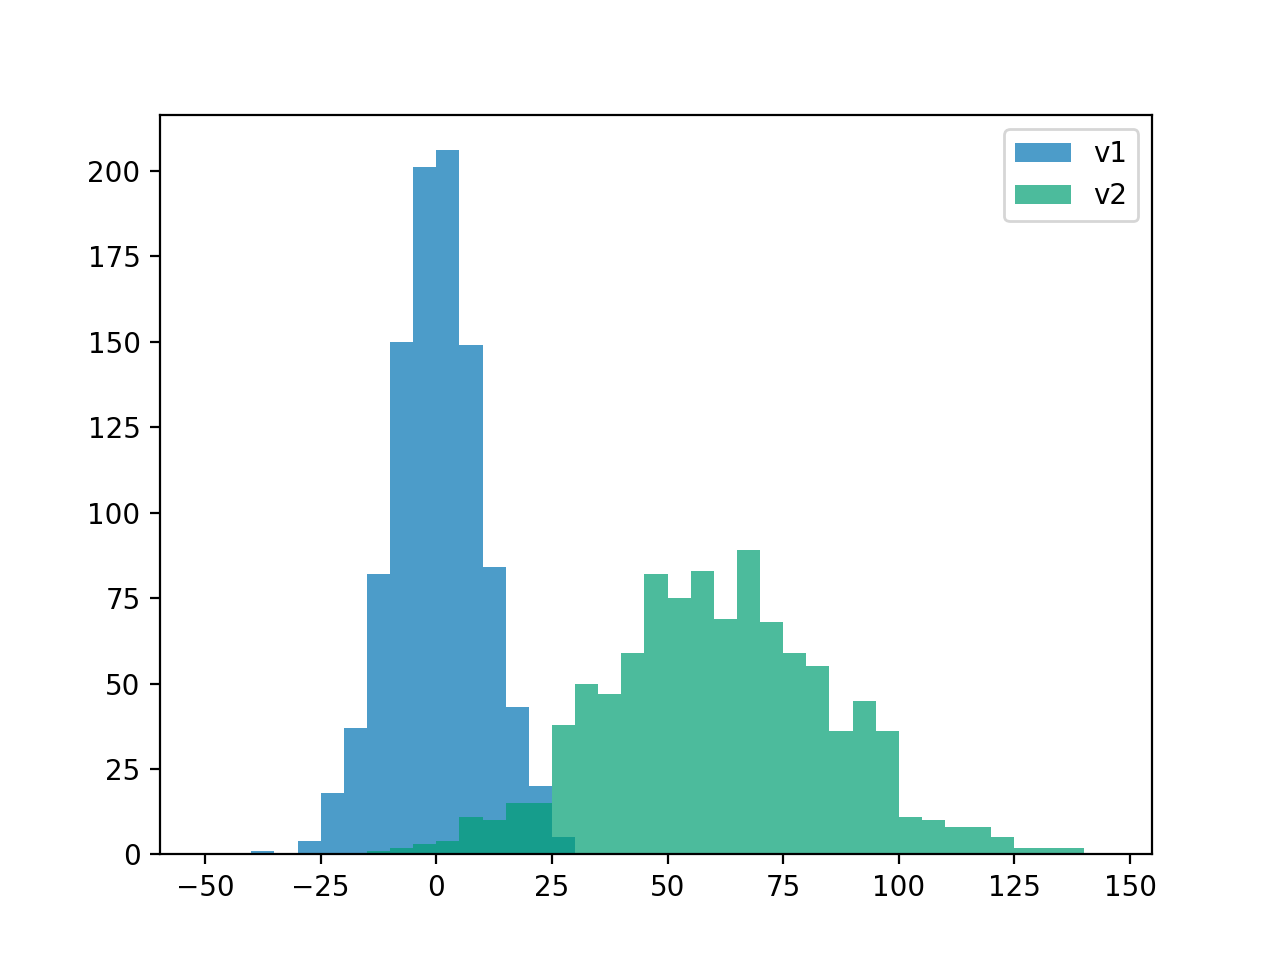

In [16]:
#plot v1, v2
plt.figure()
plt.hist(v1, alpha=0.7,bins=np.arange(-50,150,5), label='v1')
plt.hist(v2, alpha=0.7,bins=np.arange(-50,150,5), label='v2')
plt.legend()

<IPython.core.display.Javascript object>


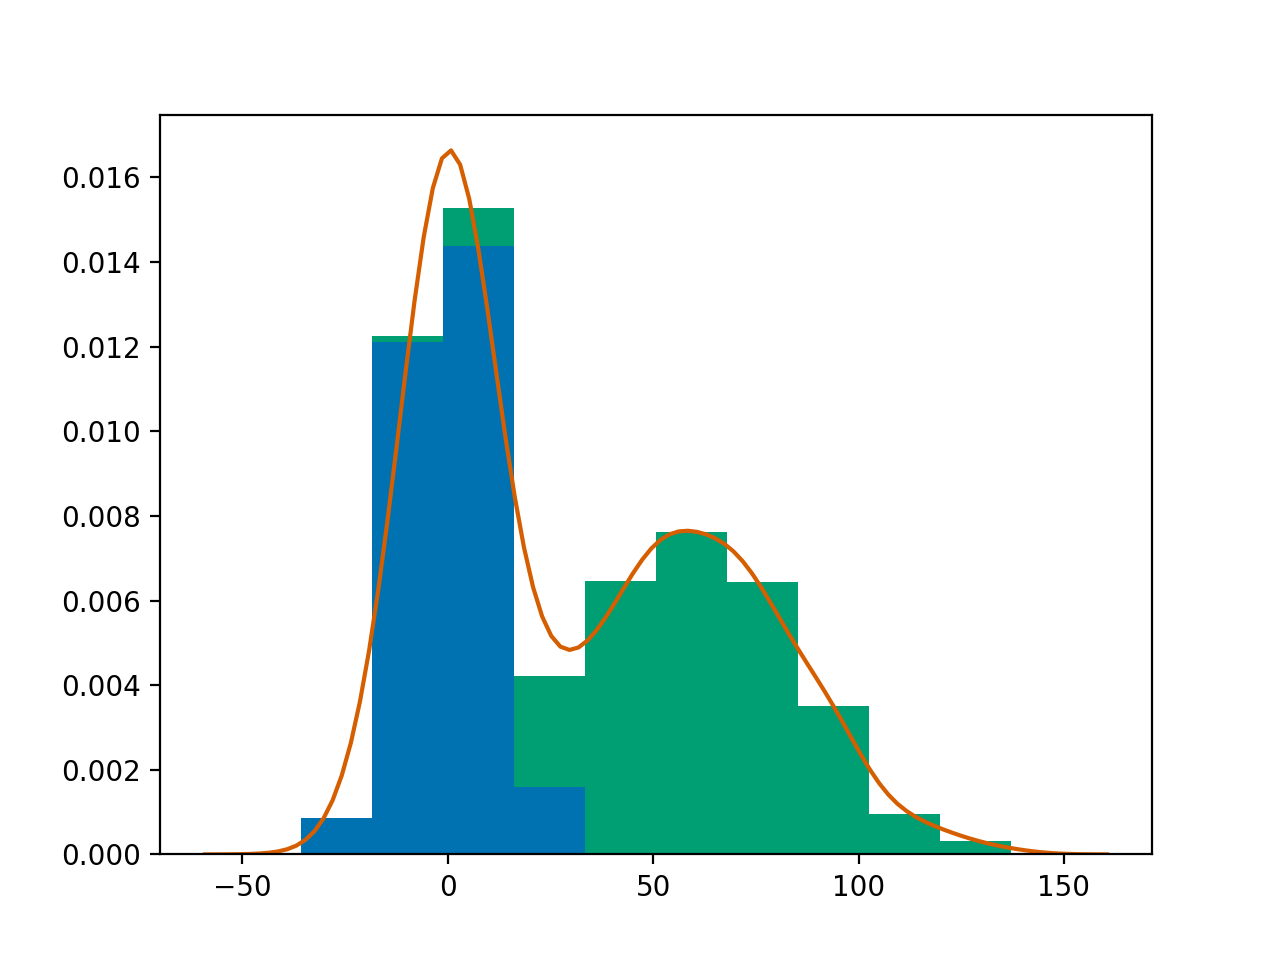

<ipython-input-17-2ac5add23a1f>:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist([v1,v2], histtype='barstacked', normed=True);


In [17]:
#v3 = concatenate v1 & v2, or the kernal densitinate estimate plot of v1 and v2
plt.figure()
plt.hist([v1,v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3)

<IPython.core.display.Javascript object>


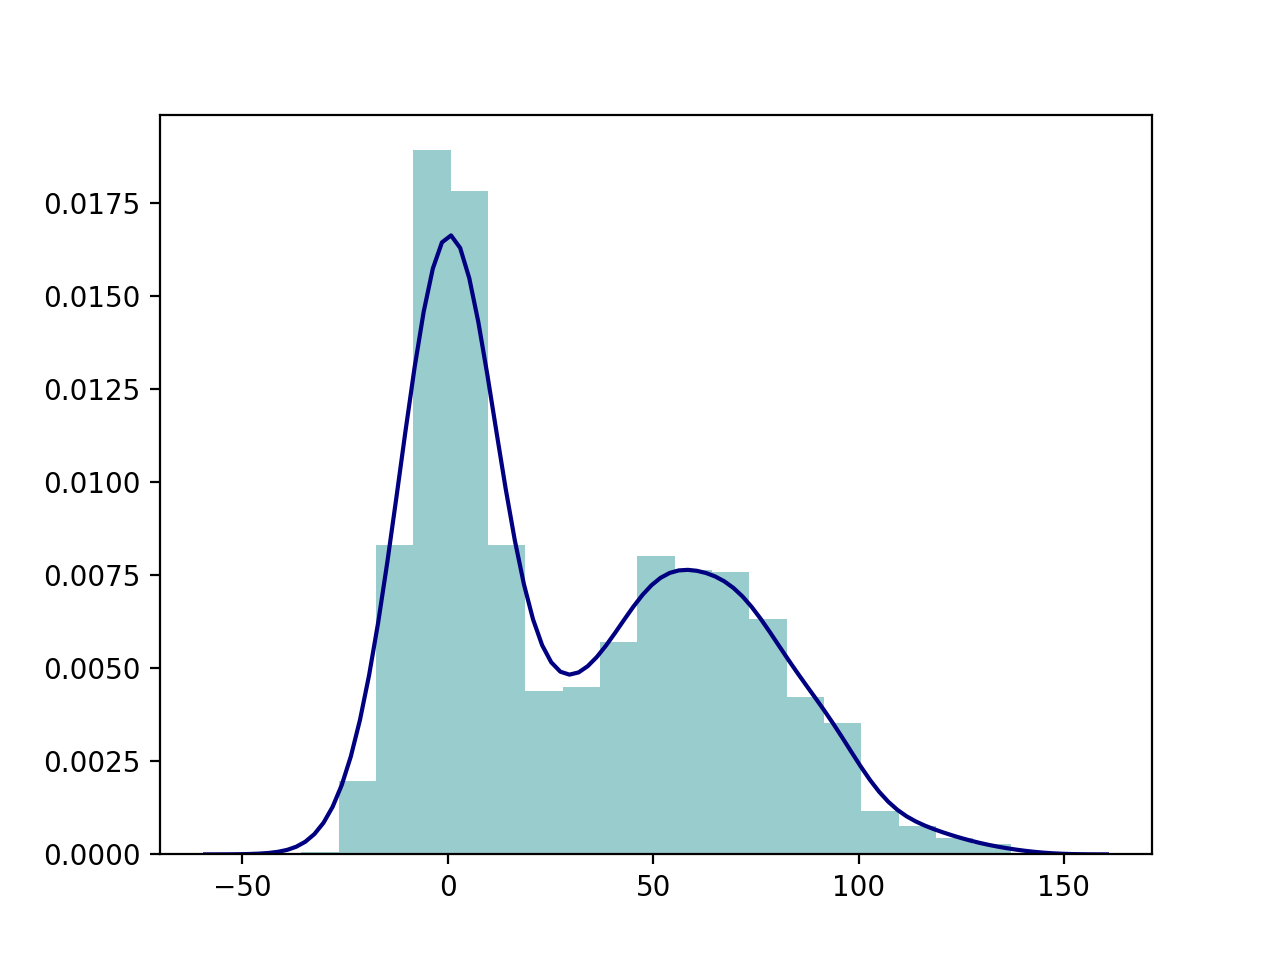

In [20]:
#pass keywordd arguments to hist and kde, also you can get a hist chart from a kde line
plt.figure()
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color':'Navy'})

<IPython.core.display.Javascript object>


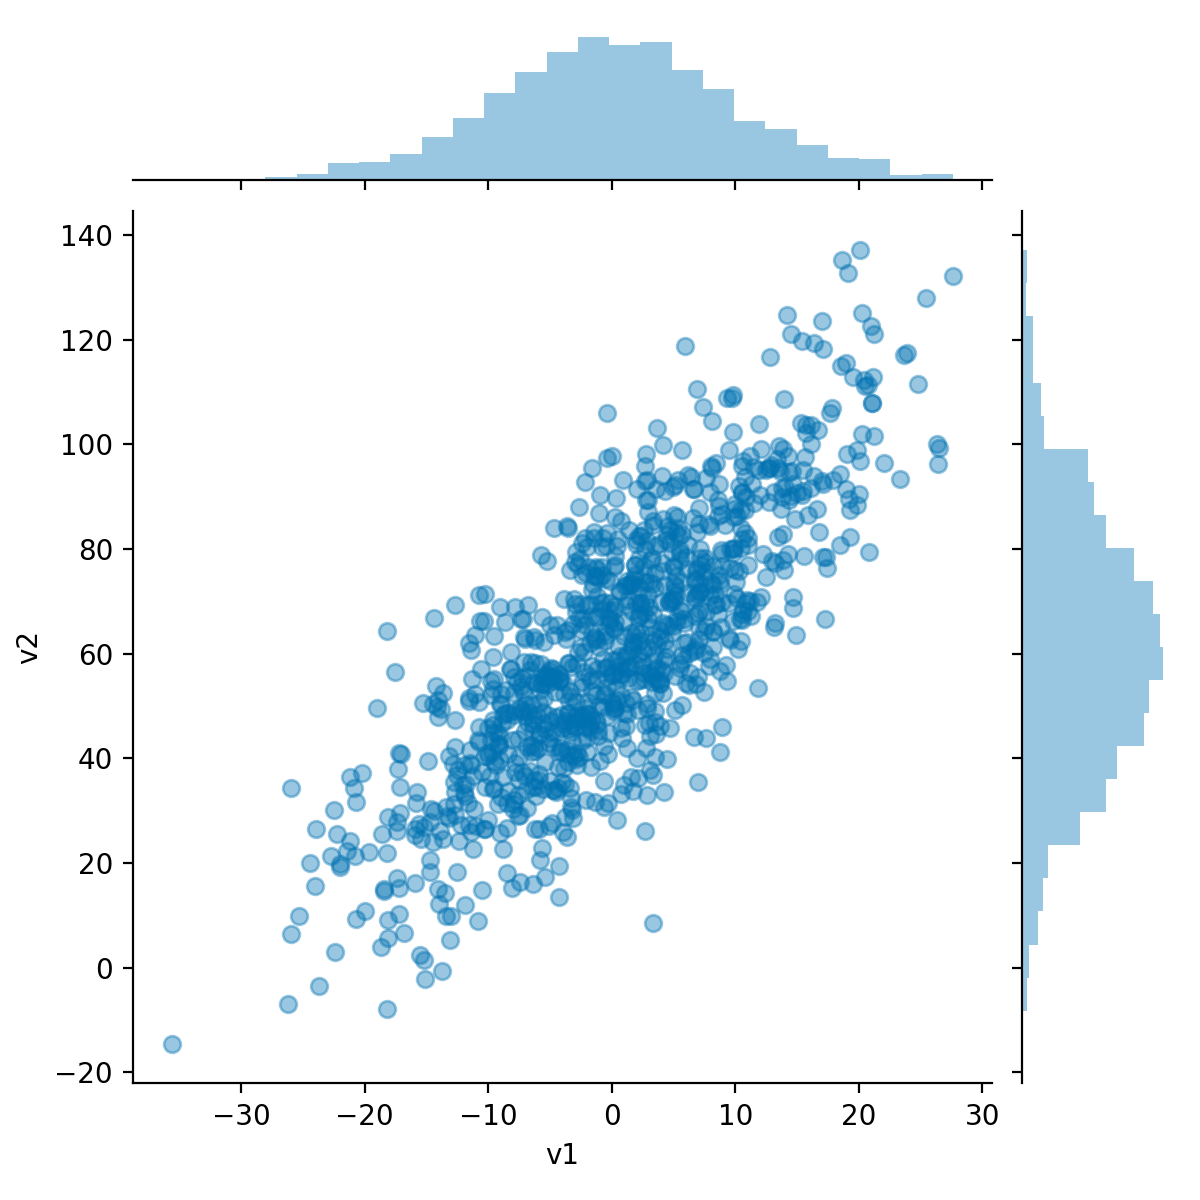

In [22]:
#jointplot
sns.jointplot(v1,v2,alpha=0.4)

<IPython.core.display.Javascript object>


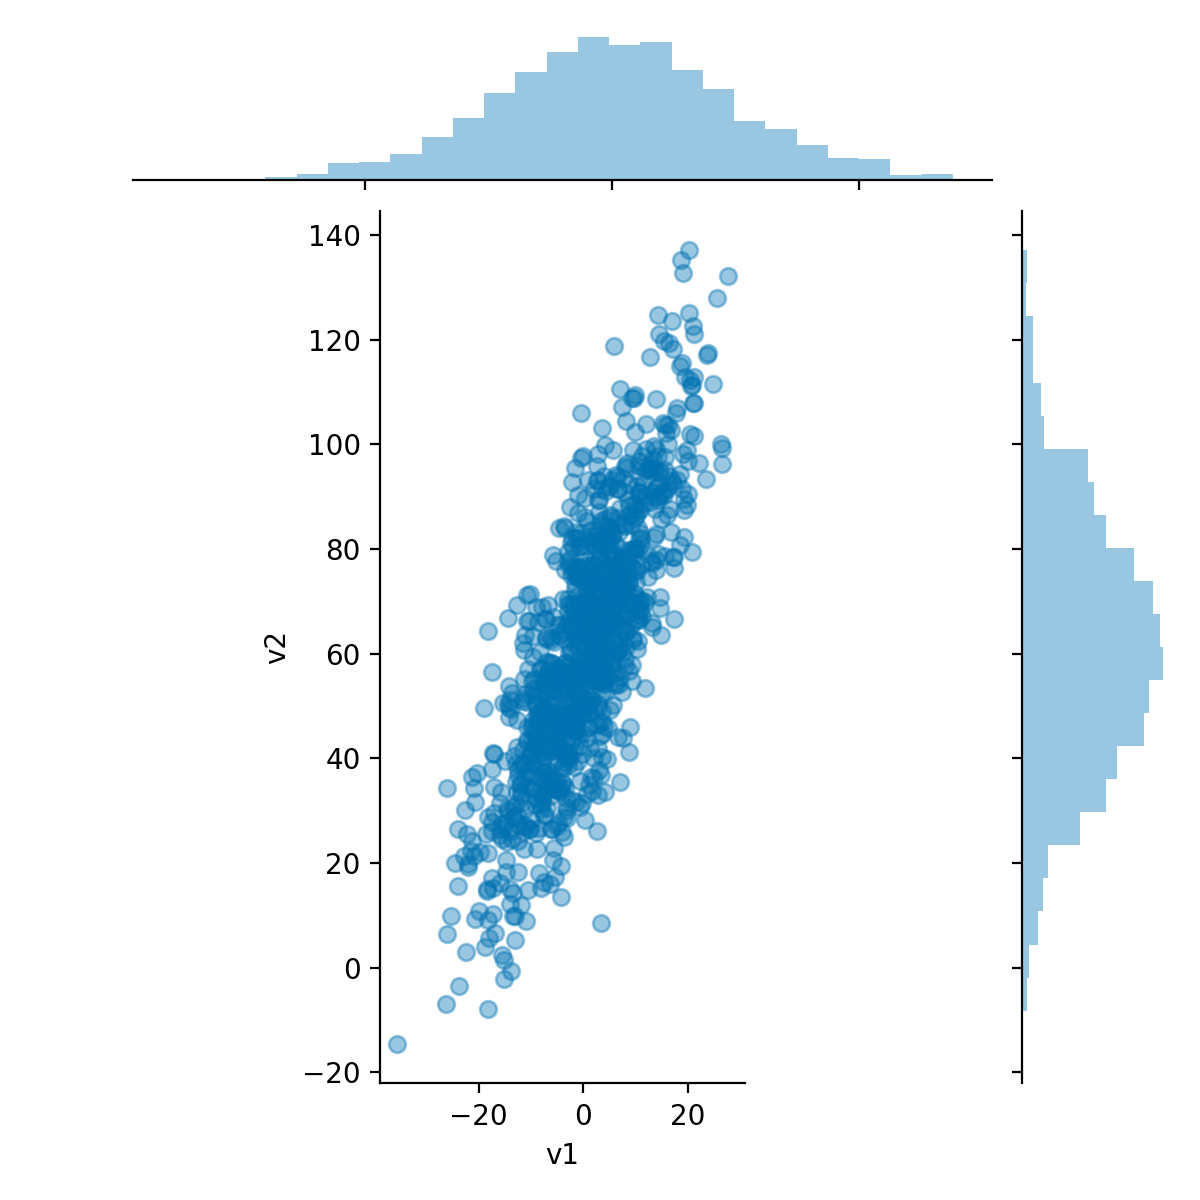

In [24]:
#equal aspect for the jointplot
grid = sns.jointplot(v1,v2,alpha=0.4)
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


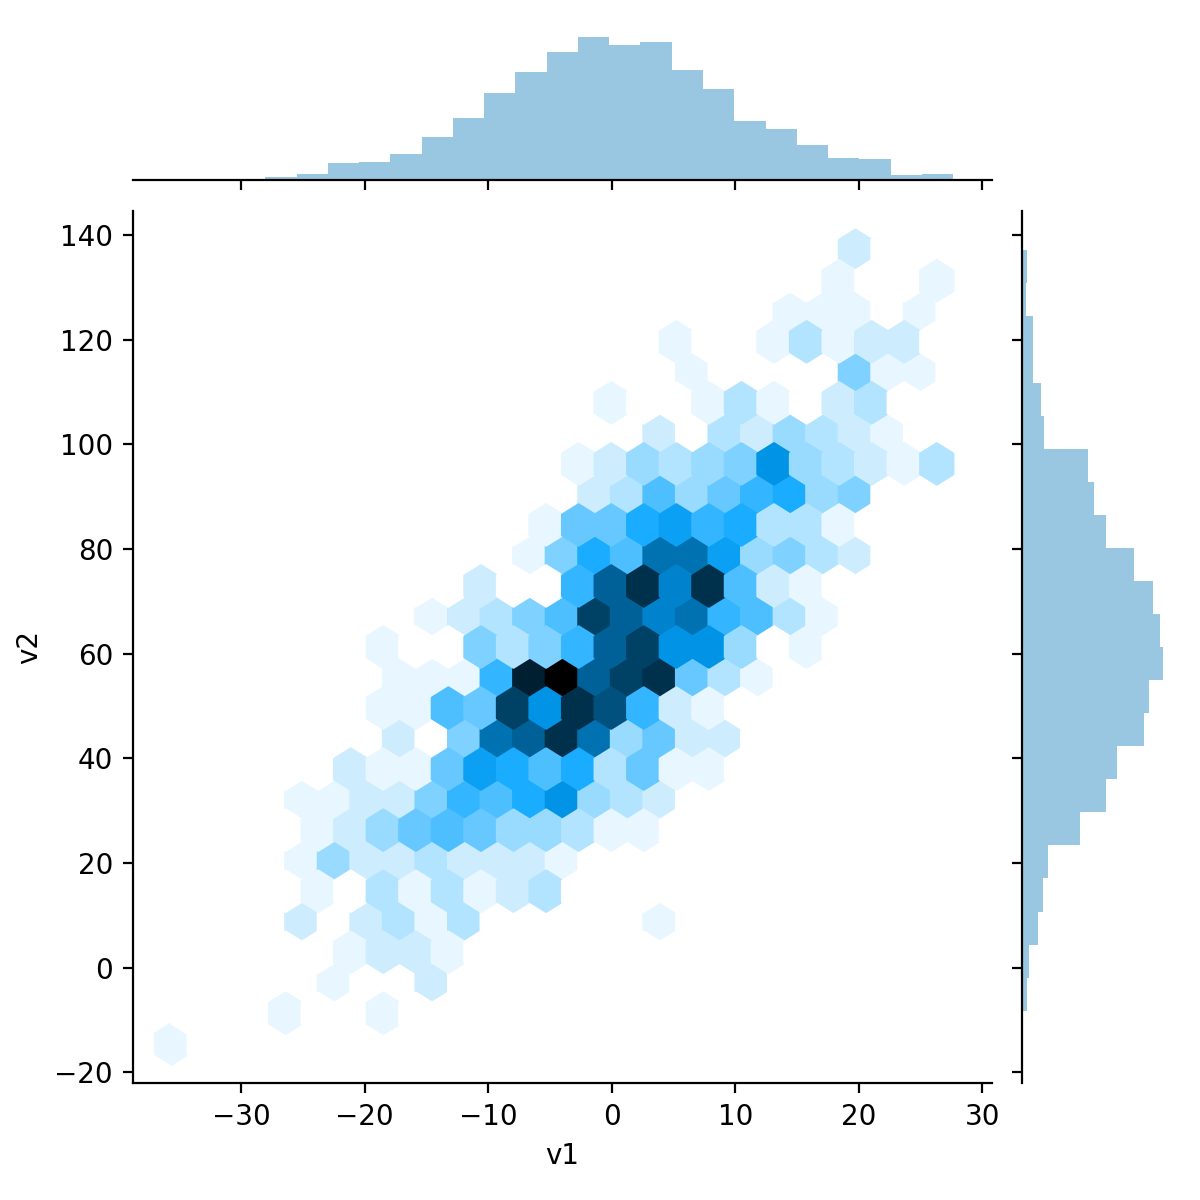

In [25]:
#join them in hex style
sns.jointplot(v1,v2,kind='hex')

<IPython.core.display.Javascript object>


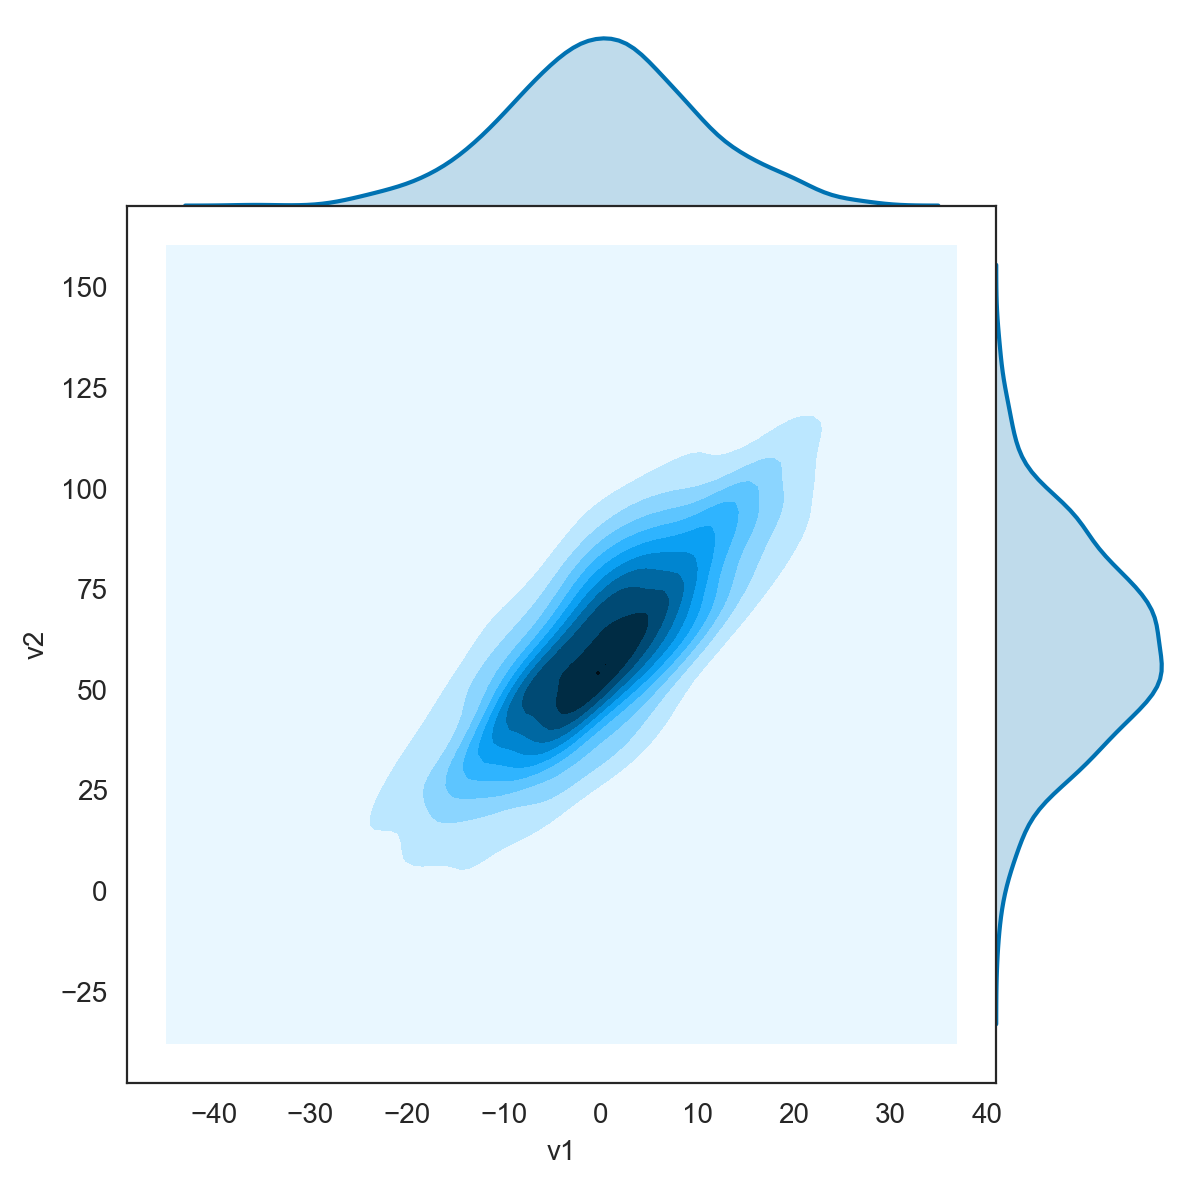

In [27]:
#all following plots have white styple, and the kde version of the jointplot
sns.set_style('white')
sns.jointplot(v1,v2,kind='kde',space=0)

<IPython.core.display.Javascript object>


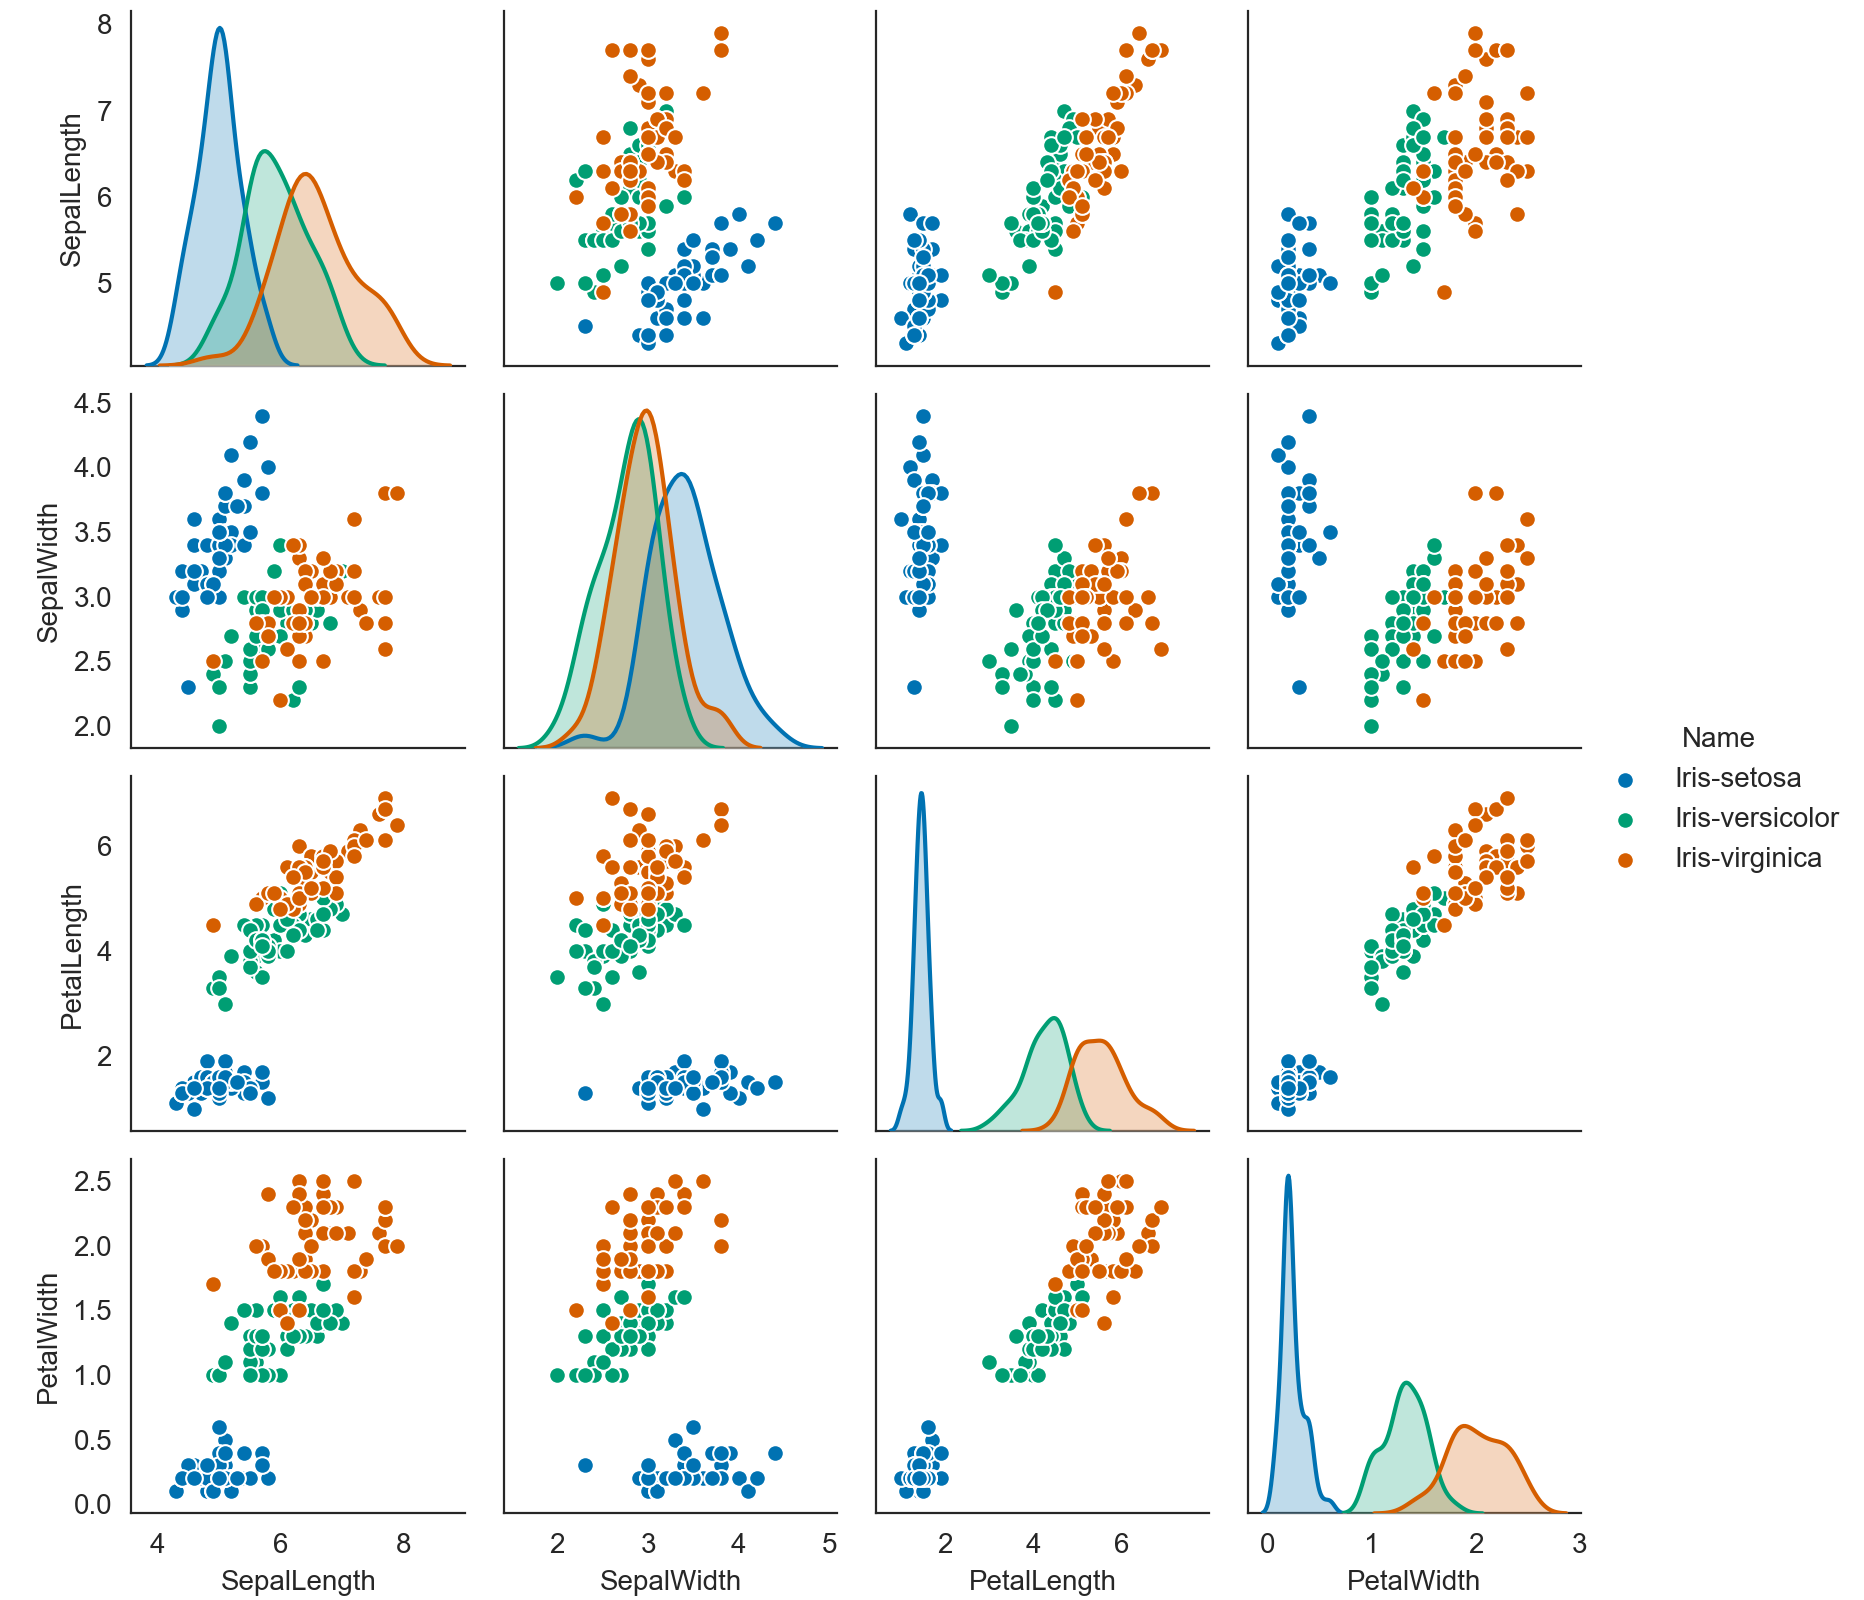

In [29]:
#pairplot with seaborn: doesnt it look much better?
sns.pairplot(iris, hue='Name',diag_kind='kde',height=2)

<IPython.core.display.Javascript object>


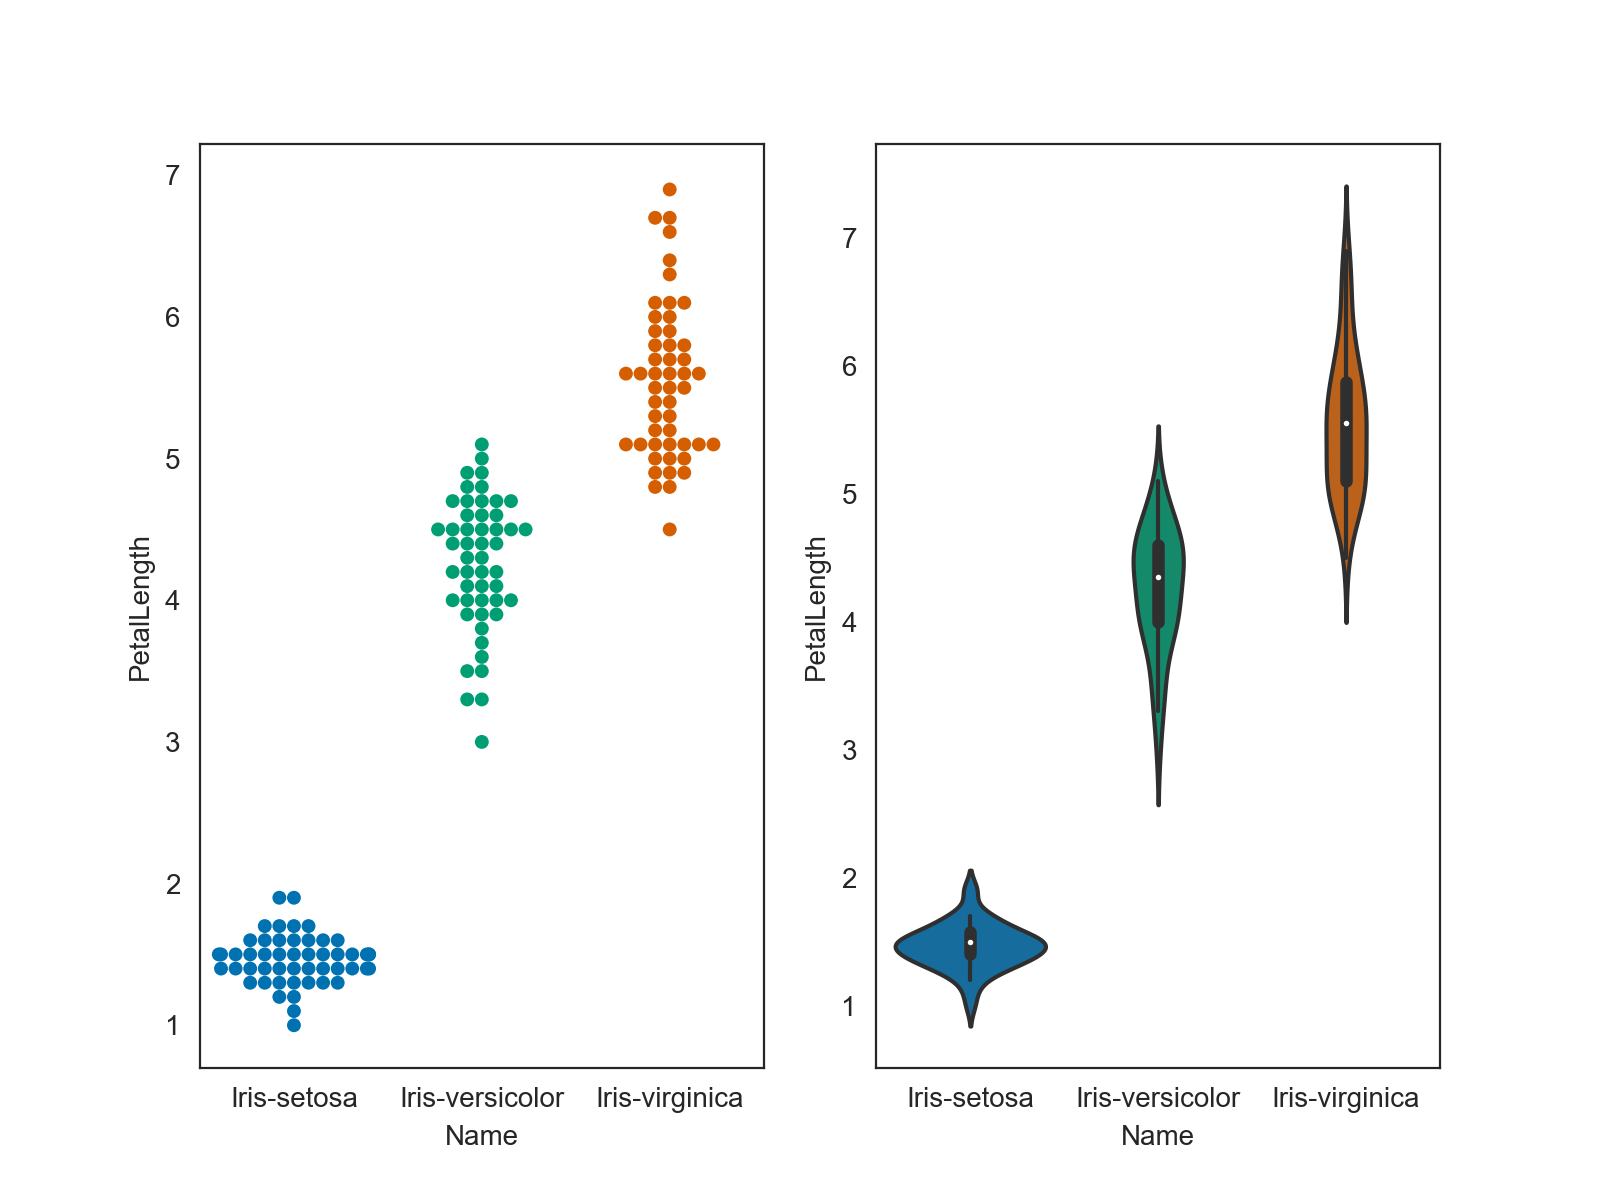

In [30]:
#swarmplot v.s. violinplot
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name','PetalLength',data=iris)
plt.subplot(122)
sns.violinplot('Name','PetalLength', data=iris)